<a href="https://colab.research.google.com/github/Y07-assine/Medical-Data-Visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import data

In [ ]:
df = pd.read_csv('/content/medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Add an overweight column to the data. To determine if a person is overweight

In [ ]:
BMI = df['weight']/pow(df['height']/100,2)

df['overweight'] = np.where(BMI >25 ,1,0)


In [ ]:
df.shape

(70000, 14)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
df['cholesterol'] = np.where(df['cholesterol'].values >1 ,1,0)
df['gluc'] = np.where(df['gluc'].values >1 ,1,0)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


# Draw Categorical Plot

1. Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'

In [ ]:
pd.melt(df[['cholesterol','gluc','smoke','alco','active','overweight']])

,variable,value
0,cholesterol,0
1,cholesterol,1
2,cholesterol,1
3,cholesterol,0
4,cholesterol,0
...,...,...
419995,overweight,1
419996,overweight,1
419997,overweight,1
419998,overweight,1


2. Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [ ]:
df_cat = pd.melt(df, value_vars=['cholesterol','gluc','smoke','alco','active','overweight'], id_vars="cardio")
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [ ]:
df_cat["total"] = 1
df_cat = df_cat.groupby(["cardio","variable","value"],as_index=False).count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


3. Draw the catplot with 'sns.catplot()'

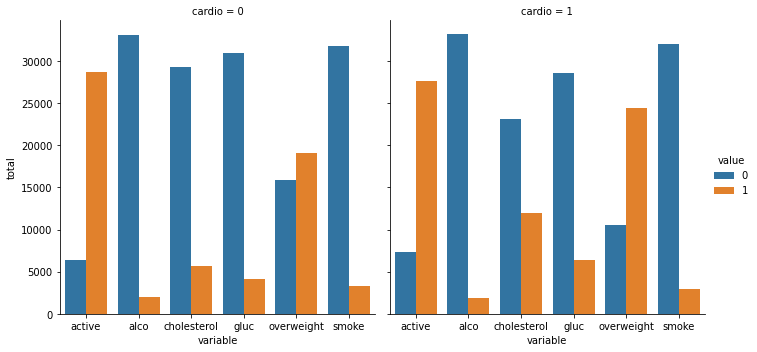

In [ ]:
fig = sns.catplot(data = df_cat, x='variable', y='total', hue='value', col='cardio', kind="bar", ci = None).fig


In [ ]:
fig.savefig('catplot.png')

# Draw Heat Map

In [ ]:
df.describe

<bound method NDFrame.describe of           id    age  gender  height  ...  alco  active  cardio  overweight
0          0  18393       2     168  ...     0       1       0           0
1          1  20228       1     156  ...     0       1       1           1
2          2  18857       1     165  ...     0       0       1           0
3          3  17623       2     169  ...     0       1       1           1
4          4  17474       1     156  ...     0       0       0           0
...      ...    ...     ...     ...  ...   ...     ...     ...         ...
69995  99993  19240       2     168  ...     0       1       0           1
69996  99995  22601       1     158  ...     0       1       1           1
69997  99996  19066       2     183  ...     1       0       1           1
69998  99998  22431       1     163  ...     0       0       1           1
69999  99999  20540       1     170  ...     0       1       0           0

[70000 rows x 14 columns]>

1. Clean the data

 Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [ ]:
df_heat =  df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [ ]:
df_heat.shape

(63259, 14)

2. Calculate the correlation matrix

In [ ]:
df_heat.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [ ]:
corr = df_heat.corr()

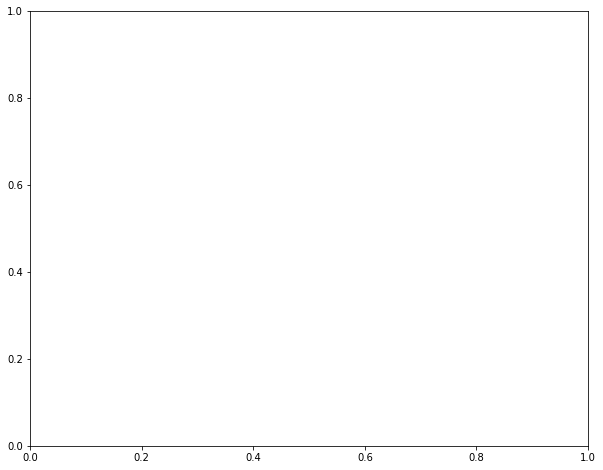

In [ ]:
fig, ax = plt.subplots( figsize=(10,8) )

In [ ]:
mask = np.triu(corr)

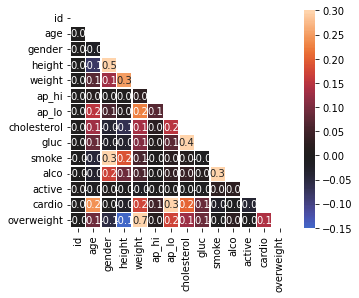

In [ ]:
ax = sns.heatmap(corr, mask=mask,
            annot=True, center=0,
            linewidths=.5, square=True,
            vmin=-0.15, vmax=0.3, fmt='0.1f')

In [ ]:
fig.savefig('heatmap.png')